# Exploratory Data Analysis (EDA)

---

Exploratory data analysis (EDA) is an important step in the machine learning process that involves understanding the characteristics and patterns in the data.

My EDA steps:

1.   Data Loading and Inspection
2.   Data Transformation
3.   Data Cleaning
4.   Univariate Analysis
5.   Bivariate Analysis
6.   Multivariate Analysis
7.   Feature Selection





## Required Libraries

In [109]:
# pip install ydata-profiling 
# from ydata_profiling import ProfileReport

import requests, io 
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading and Inspection

1.   Data is retrieved from "UC Irvine Machine Learning Repository" via request.
2.   The source file is in a compressed zip format therefore it is requred to unzip the file, for this step I used zipfile library.
3. The unzipped file contains data.csv file where elements are delimited by ";".

In [110]:
URL = 'https://archive-beta.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'

req = requests.get(URL)

zipped = ZipFile(io.BytesIO(req.content))

dataset = pd.read_csv(zipped.open('data.csv'), delimiter=';')


Inspecting the first few rows to get general understanding of the data structure, attributes, and data types.


In [111]:
dataset.head().transpose()

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance\t,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


In [112]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [113]:
dataset.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

## Data Transformation
Since most of the attributes in the dataset are categorical (represented by discrete numeric values, it makes sense to change the data type to categorical. In this case, converting the data type to categorical will allow me to better analyze the relationship between the categorical attributes and the Target attribute.

In [114]:
categorical_attributes = [
    'Marital status', 
    'Application mode', 
    'Application order', 
    'Course', 
    'Daytime/evening attendance\t', 
    'Previous qualification', 
    'Nacionality', 
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation", 
    'Displaced', 
    'Educational special needs', 
    'Debtor', 
    'Tuition fees up to date', 
    'Gender', 
    'Scholarship holder', 
    'International'
]

In [115]:
df = dataset.iloc[:,].copy()
for column in categorical_attributes:
  df[column] = df[column].astype('category')

In [116]:
non_categorical_attributes = [column for column in df.columns if df[column].dtype not in ['object', 'category']]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

## Data Cleaning

In this step I am checking for missing values, duplicate rows, and outliers.

### Missing values

In [118]:
df.isnull().sum().sum()

0

### Duplicated rows

In [119]:
df.duplicated().sum()

0

### Outliers

In [120]:
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 

In [121]:
df_outlier_test = dataset.iloc[:,].copy()
df_outlier_test[non_categorical_attributes] = df_outlier_test[non_categorical_attributes].apply(normalize)

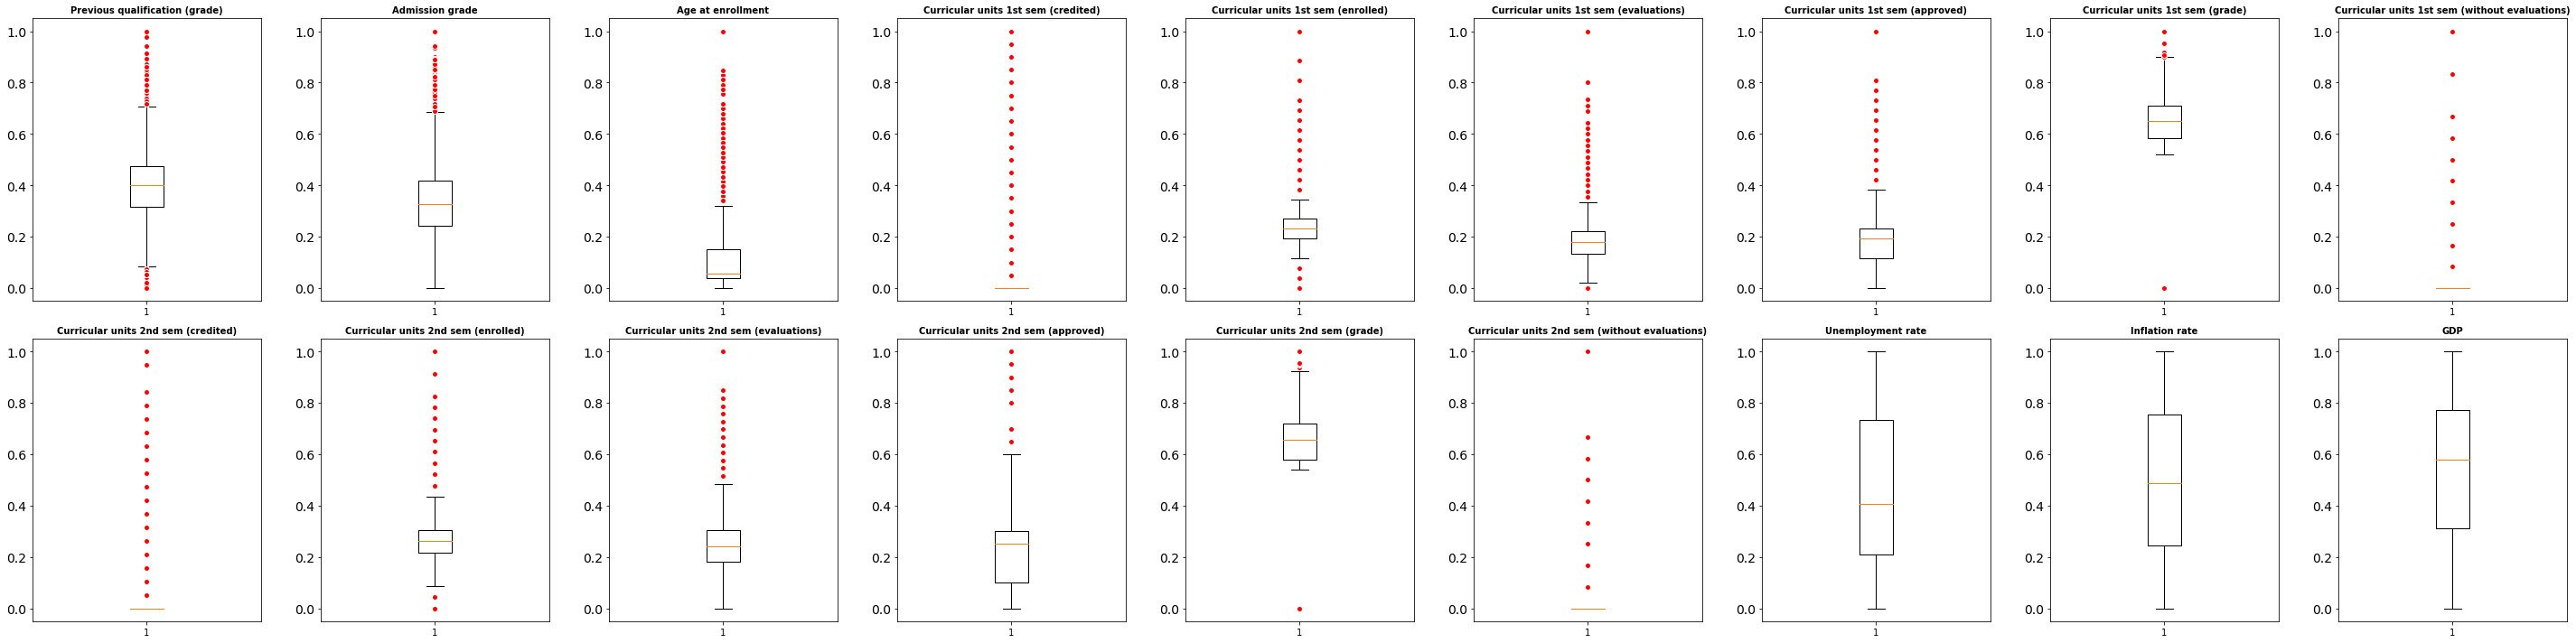

In [122]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(2, int(len(non_categorical_attributes)/2), figsize=(40,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_outlier_test[non_categorical_attributes].iloc[:,i], flierprops=red_circle)
    ax.set_title(df_outlier_test[non_categorical_attributes].columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Univariate Analysis

In [57]:
def describe_attribute(df, column_name):
  print(f"\nCOLUMN: {column_name}")
  print(f"{df[column_name].nunique()} different values")
  print(f"List of values:")
  print(df[column_name].value_counts(normalize=True))

In [123]:
for column in df[categorical_attributes].columns:
  describe_attribute(dataset, column)


COLUMN: Marital status
6 different values
List of values:
1    0.885850
2    0.085669
4    0.020570
5    0.005651
6    0.001356
3    0.000904
Name: Marital status, dtype: float64

COLUMN: Application mode
18 different values
List of values:
1     0.386076
17    0.197107
39    0.177441
43    0.070524
44    0.048146
7     0.031420
18    0.028029
42    0.017405
51    0.013336
16    0.008590
53    0.007911
15    0.006781
5     0.003617
10    0.002260
2     0.000678
57    0.000226
26    0.000226
27    0.000226
Name: Application mode, dtype: float64

COLUMN: Application order
8 different values
List of values:
1    0.683996
2    0.123644
3    0.069846
4    0.056284
5    0.034810
6    0.030967
9    0.000226
0    0.000226
Name: Application order, dtype: float64

COLUMN: Course
17 different values
List of values:
9500    0.173146
9147    0.085895
9238    0.080244
9085    0.076175
9773    0.074819
9670    0.060579
9991    0.060579
9254    0.056962
9070    0.051085
171     0.048599
8014    0.048

## Bivariate Analysis

## Multivariate Analysis

## Feature Selection